In [33]:
import pandas as pd
import seaborn as sns
df = pd.read_json('https://raw.githubusercontent.com/theand9/data-viz-challenge/master/data.json')
df1=pd.DataFrame([i for i in df.data])

In [34]:
df1.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN


In [35]:
from datetime import datetime
date_time=[]
for i in df1['client_time']:
    k=datetime.utcfromtimestamp(i).strftime('%d-%m-%Y  %H:%M:%S')
    date_time.append(k)


In [36]:
print(date_time[4])

01-03-2014  00:00:51


In [37]:
import numpy as np
date = np.array(date_time)


In [38]:
df1['date']=date

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


Sports         10099
Technology     10029
Environment     9980
Games           9955
Fashion         9937
Name: category, dtype: int64


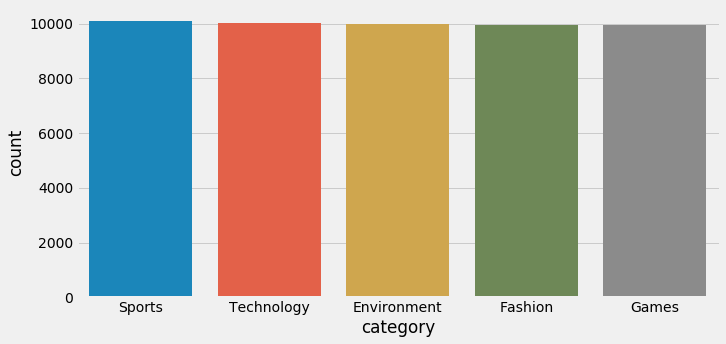

In [74]:
print(df1['category'].value_counts())
sns.catplot( x="category", kind="count", data=df1, ci=None, aspect=2)
plt.show()


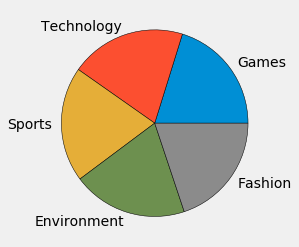

In [71]:
plt.style.use("fivethirtyeight")
slices=df1['category'].value_counts()
labels=list(set(df1['category']))
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})

plt.show()

In [123]:
#analysing all users in sports and environment field 
d= df1[(df1['category']=='Sports') | (df1['category']=='Environment')]
d.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount,date
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN,01-03-2014 00:00:04
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN,01-03-2014 00:00:32
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN,01-03-2014 00:00:51
12,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,"{'latitude': 33.794055, 'city': 'Atlanta', 'st...",NaN,01-03-2014 00:02:51
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",31.0,01-03-2014 00:03:20


gender  event_name  
F       Fund Project    3893
        View Project    5557
M       Fund Project    3751
        View Project    5461
U       Fund Project     624
        View Project     793
dtype: int64


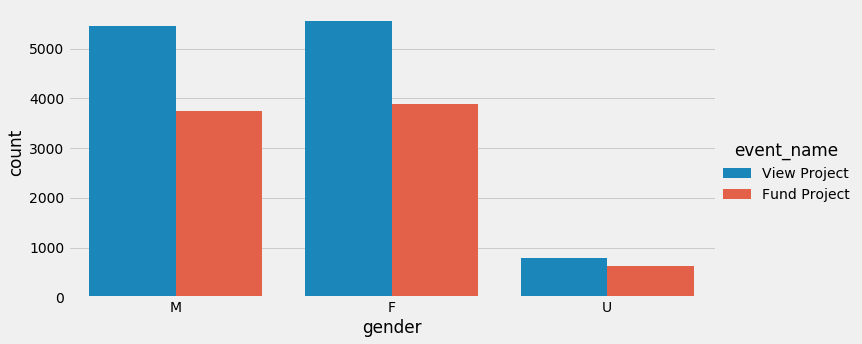

In [126]:
print(d.groupby(['gender', 'event_name']).size())
sns.catplot( x="gender", kind="count",hue="event_name",data=d, ci=None, aspect=2)
plt.show()
#this graph implies that irrespective of gender almost same ratio of people view and fund projects respectively

marital_status  event_name  
married         Fund Project    5393
                View Project    7485
single          Fund Project    2875
                View Project    4326
dtype: int64


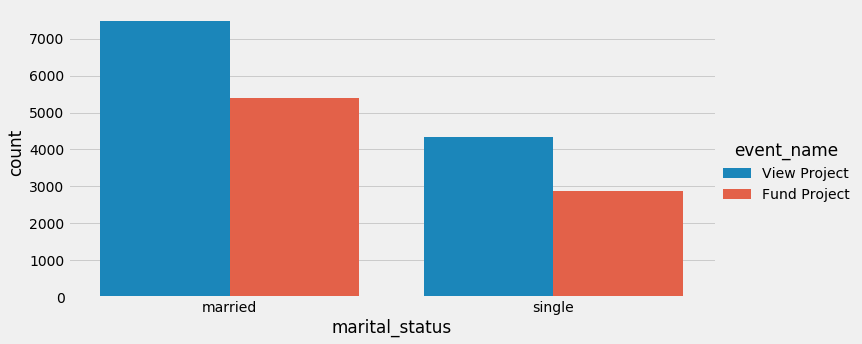

In [127]:
print(d.groupby(['marital_status', 'event_name']).size())
sns.catplot( x="marital_status", kind="count",hue="event_name",data=d, ci=None, aspect=2)
plt.show()
#from this graph we imply that th ratio of people funding to total people is almost equal in both (married=0.41,single=0.39)
#so we target both equally but since the number of married people are more we are more likely to get a better response there

device   event_name  
android  Fund Project    2893
         View Project    4237
iOS      Fund Project    5375
         View Project    7574
dtype: int64


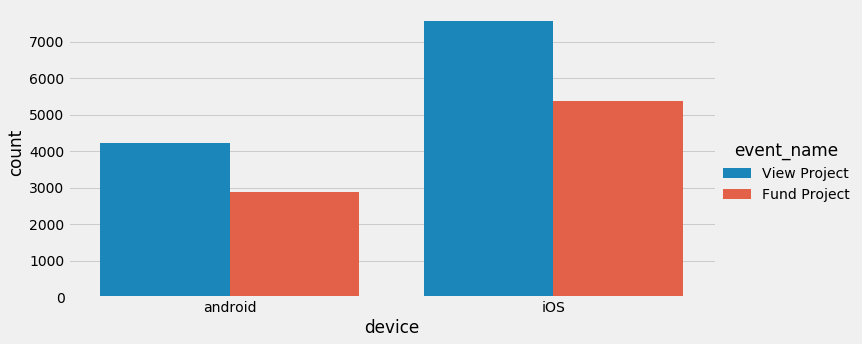

In [128]:
print(d.groupby(['device', 'event_name']).size())
sns.catplot( x="device", kind="count",hue="event_name",data=d, ci=None, aspect=2)
plt.show()
#from this graph we imply that the ratio of people funding to total people is almost equal in both (ios=0.41,android=0.405)
#so we target both equally but since the number of ios users are more we are more likely to get more response there

Sports         4179
Games          4173
Technology     4144
Environment    4089
Fashion        4073
Name: category, dtype: int64


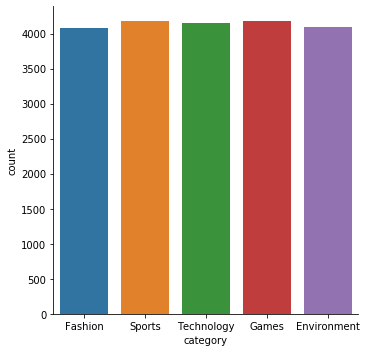

In [31]:
df2=df1[df1.event_name!='View Project']
print(df2['category'].value_counts())
sns.catplot( x="category", kind="count", data=df2, ci=None, aspect=1)
plt.show()


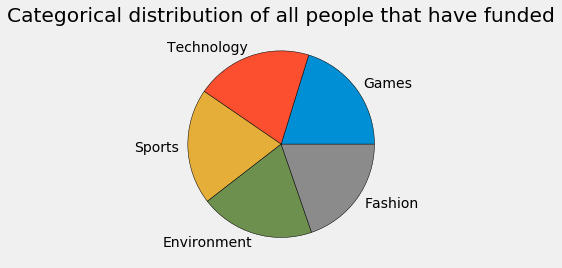

In [76]:
plt.style.use("fivethirtyeight")
slices=df2['category'].value_counts()
labels=list(set(df1['category']))
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})
plt.title('Categorical distribution of all people that have funded')
plt.show()

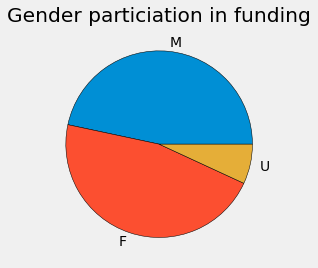

In [79]:
plt.style.use("fivethirtyeight")
slices=df3['gender'].value_counts()
labels=['M','F','U']
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})
plt.title('Gender particiation in funding')
plt.show()

Sports         5920
Environment    5891
Technology     5885
Fashion        5864
Games          5782
Name: category, dtype: int64


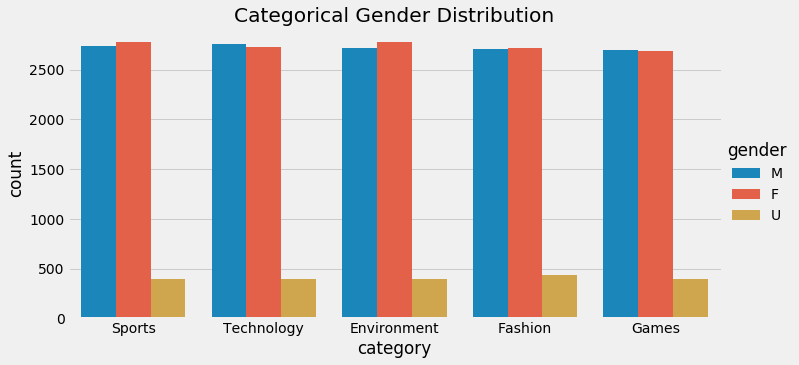

In [81]:
df3=df1[df1.event_name!='Fund Project']
print(df3['category'].value_counts())
sns.catplot( x="category", kind="count",hue="gender" ,data=df3, ci=None, aspect=2)
plt.title('Categorical Gender Distribution')
plt.show()
#thus this graph shows all categories have almost equal male ,female participation while unknowns have a lesser participation

F    3893
M    3751
U     624
Name: gender, dtype: int64


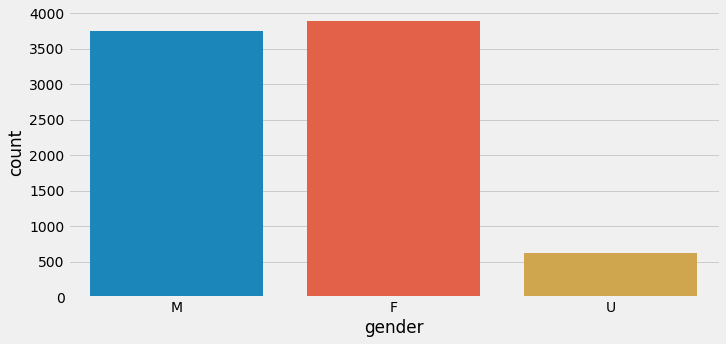

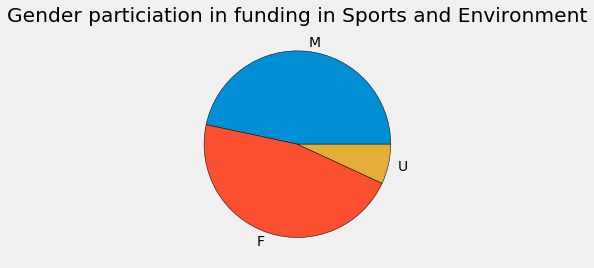

In [84]:
#gender wise breakup in required fields
print(df4['gender'].value_counts())
sns.catplot( x="gender", kind="count",data=df4, ci=None, aspect=2)
plt.show()

plt.style.use("fivethirtyeight")
slices=df3['gender'].value_counts()
labels=['M','F','U']
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})
plt.title('Gender particiation in funding in Sports and Environment')
plt.show()
#graphs implies that females have a slight tendency of funding more than males 

gender  age  
F       18-24    1975
        25-34     491
        35-44     501
        45-54     466
        55+       460
M       18-24    1879
        25-34     450
        35-44     455
        45-54     489
        55+       478
U       18-24     332
        25-34      64
        35-44      76
        45-54      76
        55+        76
dtype: int64


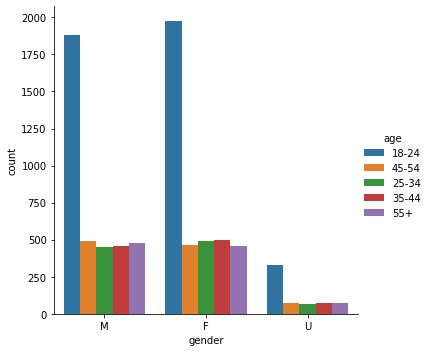

In [52]:
#gender wise breakup with age param
print(df4.groupby(['gender', 'age']).size())
sns.catplot( x="gender", kind="count",hue="age" ,data=df4, ci=None, aspect=1)
plt.show()
#this graph implies that men and women of age 18-24 invest a lot nore as compared to others
#thus we should target that age group more.


married    5393
single     2875
Name: marital_status, dtype: int64


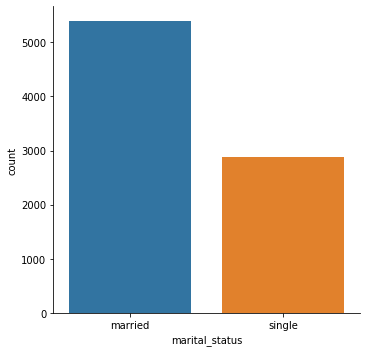

In [53]:
print(df4['marital_status'].value_counts())
sns.catplot( x="marital_status", kind="count",data=df4, ci=None, aspect=1)
plt.show()
#graph implies married people invest a lot more than singles

marital_status  age  
married         18-24    2732
                25-34     648
                35-44     644
                45-54     641
                55+       728
single          18-24    1454
                25-34     357
                35-44     388
                45-54     390
                55+       286
dtype: int64


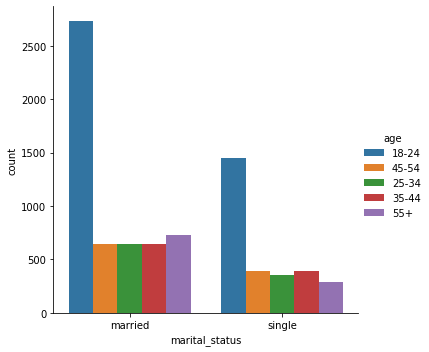

In [57]:
print(df4.groupby(['marital_status', 'age']).size())
sns.catplot( x="marital_status", kind="count",hue="age" ,data=df4, ci=None, aspect=1)
plt.show()
#no new trend noticed,married people in age group18-24 fund a lot more

iOS        5375
android    2893
Name: device, dtype: int64


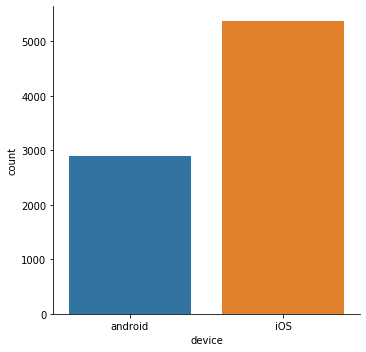

In [59]:
print(df4['device'].value_counts())
sns.catplot( x="device", kind="count",data=df4, ci=None, aspect=1)
plt.show()

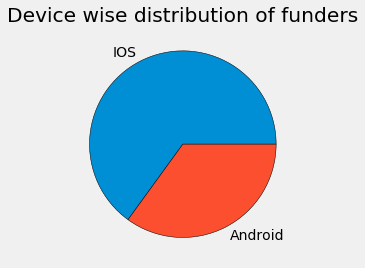

In [89]:
plt.style.use("fivethirtyeight")
slices=df4['device'].value_counts()
labels=['IOS','Android']
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})
plt.title('Device wise distribution of funders')
plt.show()

device   age  
android  18-24    1474
         25-34     355
         35-44     344
         45-54     394
         55+       326
iOS      18-24    2712
         25-34     650
         35-44     688
         45-54     637
         55+       688
dtype: int64


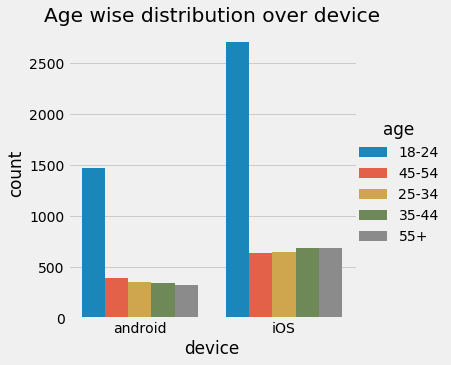

In [90]:
print(df4.groupby(['device', 'age']).size())
sns.catplot( x="device", kind="count", hue="age" ,data=df4, ci=None, aspect=1)
plt.title('Age wise distribution over device')
plt.show()
#graph and data implies ios are more likely to fund while general trend of people in 18-24 contributing more contnues

device   gender
android  F         1343
         M         1346
         U          204
iOS      F         2550
         M         2405
         U          420
dtype: int64


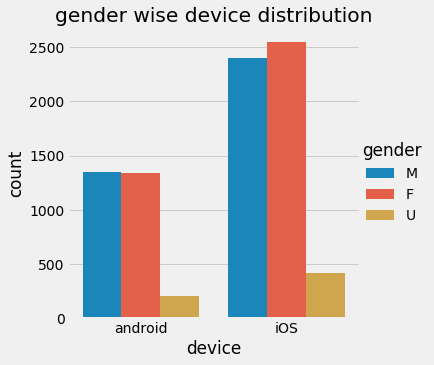

In [91]:
print(df4.groupby(['device', 'gender']).size())
sns.catplot( x="device", kind="count", hue="gender" ,data=df4, ci=None, aspect=1)
plt.title('gender wise device distribution')
plt.show()
#graph implies that almost equal number of men and women contribute to funding over android while in ios ,
#the number of women is slightly higher than the men 

         amount
age            
18-24  164588.0
25-34   40063.0
35-44   41149.0
45-54   39886.0
55+     40218.0


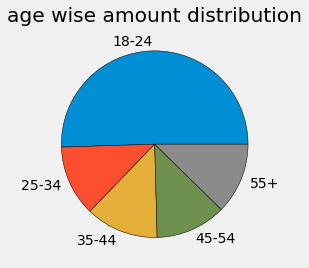

In [112]:
print(df4.groupby(['age']).sum()[['amount']])
plt.style.use("fivethirtyeight")
slices=[164588,40063,41149,39886,40218]
labels=['18-24','25-34','35-44','45-54','55+']
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})
plt.title('Age wise amount distribution')
plt.show()

          amount
gender          
F       152799.0
M       148482.0
U        24623.0


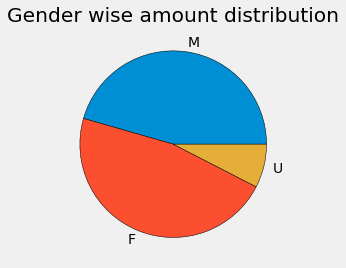

In [114]:
print(df4.groupby(['gender']).sum()[['amount']])
plt.style.use("fivethirtyeight")
slices=[148482,152799,24623]
labels=['M','F','U']
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})
plt.title('Gender wise amount distribution')
plt.show()

           amount
device           
android  114747.0
iOS      211157.0


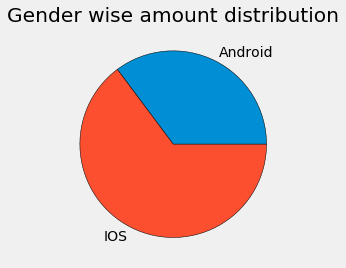

In [116]:
print(df4.groupby(['device']).sum()[['amount']])
slices=[114747,211157]
labels=['Android','IOS']
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})
plt.title('Device wise amount distribution')
plt.show()

                  amount
marital_status          
married         212495.0
single          113409.0


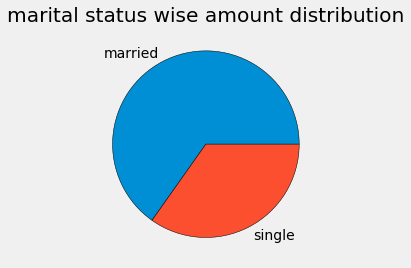

In [118]:
print(df4.groupby(['marital_status']).sum()[['amount']])
slices=[212495,113409]
labels=['married','single']
plt.pie(slices,labels=labels , wedgeprops={'edgecolor':'black'})
plt.title('marital status wise amount distribution')
plt.show()

In [121]:
df4.groupby(['age' , 'marital_status' , 'device' ])['amount'].sum()

age    marital_status  device 
18-24  married         android    30016.0
                       iOS        77950.0
       single          android    28103.0
                       iOS        28519.0
25-34  married         android     6892.0
                       iOS        19299.0
       single          android     7140.0
                       iOS         6732.0
35-44  married         android     6581.0
                       iOS        18811.0
       single          android     7060.0
                       iOS         8697.0
45-54  married         android     7375.0
                       iOS        17005.0
       single          android     8147.0
                       iOS         7359.0
55+    married         android     7434.0
                       iOS        21132.0
       single          android     5999.0
                       iOS         5653.0
Name: amount, dtype: float64

# Therfore the final analysis will according to me is to target married people with ios devices first then android users in  the age group of 18-24 followed by single users in the same age group.All the above people are the people that are interested in Sports and environment category.